<a href="https://colab.research.google.com/github/Taseer09/ML-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
# Loading Dataset
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Data Preprocessing

In [3]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df = df.fillna(df.mean())


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.shape

(506, 14)

In [8]:
df.rename(columns = {'MEDV': 'PRICE'}, inplace = True)

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


Understanding Corelation between Features

1: Positive Correlation

2: Negative Correlation

In [10]:
correalation = df.corr()

In [11]:
import matplotlib.pyplot as plt


<Axes: >

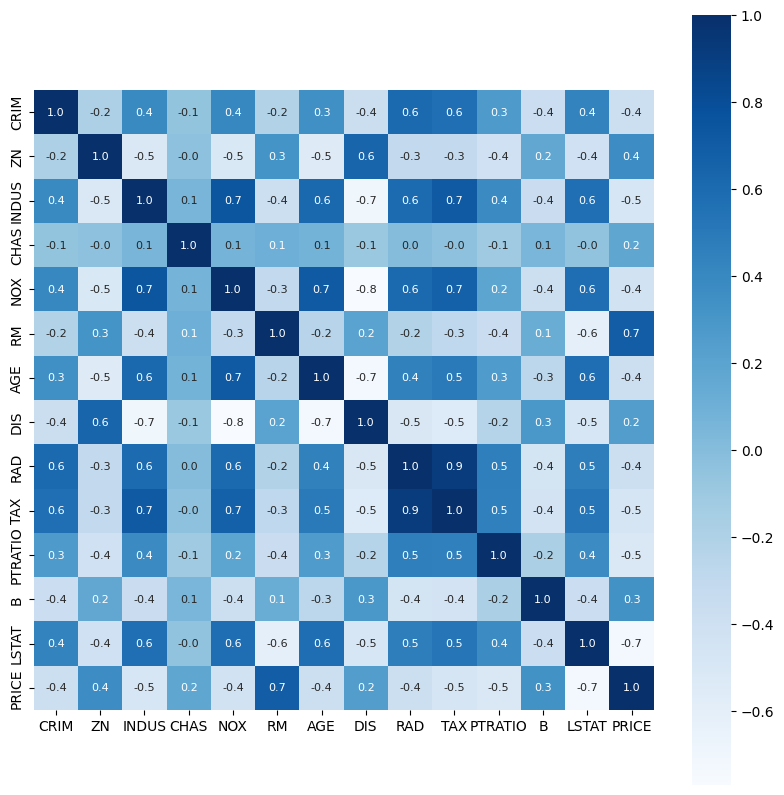

In [12]:
# Constructing a Heat map
plt.figure(figsize=(10,10))
sb.heatmap(correalation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap='Blues' )

Splitting Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['PRICE'], axis = 1)
y = df["PRICE"]

Splitting Data Into Training and Test Data

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size= 0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)


(506, 13) (404, 13) (102, 13)


Model Training

XGBoost Regressor

In [20]:
# Loading Model
from xgboost import XGBRegressor

In [21]:
model = XGBRegressor(

)

In [22]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction from Training Data

In [24]:
training_data_pred = model.predict(X_train)
print(training_data_pred)

[23.111933  21.002054  20.098005  34.6785    13.903282  13.50405
 21.99768   15.185856  10.898882  22.693007  13.793858   5.588061
 29.800228  50.001865  34.895287  20.598177  23.39295   19.206455
 32.701313  19.612007  26.988474   8.401995  45.99861   21.709255
 27.087645  19.361818  19.29078   24.79976   22.606655  31.695913
 18.544813   8.69803   17.412104  23.69795   13.300306  10.503882
 12.704823  24.999336  19.694311  14.86768   24.191     25.001179
 14.9010935 16.999802  15.599213  12.70874   24.514244  15.015075
 50.000168  17.517124  21.198206  32.001003  15.598514  22.89534
 19.298925  18.713509  23.297705  37.200474  30.097256  33.096275
 20.99633   49.994064  13.402074   5.011779  16.499424   8.394517
 28.678583  19.511633  20.586819  45.41904   39.800873  33.396564
 19.80326   33.40312   25.283972  50.00732   12.525352  17.445702
 18.598032  22.603727  50.01068   23.792957  23.312153  23.079176
 41.696415  16.109999  31.621521  36.09384    7.00184   20.38224
 19.994478  1

In [25]:
from sklearn import metrics

In [30]:
# Imported metrics for finding R squared Error
score_1 = metrics.r2_score(y_train, training_data_pred)

# Mean Absoulute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_pred)

print(f"R Squared Error is {score_1}")
print(f"Mean Absolute Error is {score_2}")

R Squared Error is 0.9999978610042701
Mean Absolute Error is 0.00928458813393476


In [31]:
import matplotlib.pyplot as plt

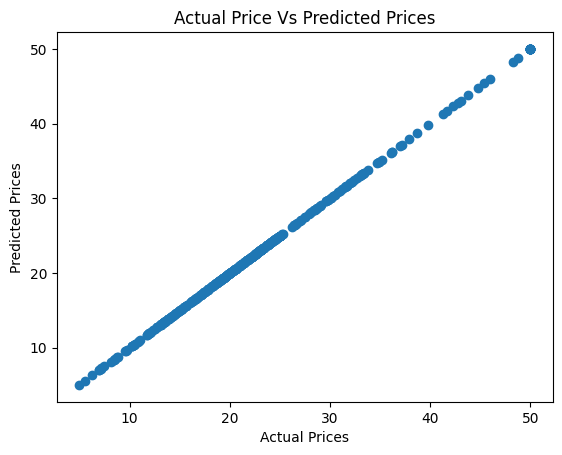

In [33]:
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price Vs Predicted Prices")
plt.show()